# Егорова Александра НПМбд-01-20

## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
from sklearn.model_selection import train_test_split
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from collections import Counter
from sklearn.base import BaseEstimator

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
datasets_names = ['make_circles', 'make_moons', 'make_classification']

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

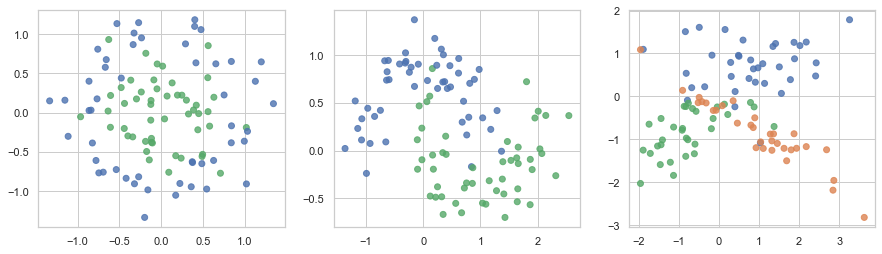

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

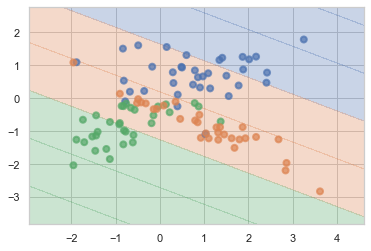

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

make_circles
train accuracy =  1.0
test accuracy =  0.7
make_moons
train accuracy =  1.0
test accuracy =  0.95
make_classification
train accuracy =  1.0
test accuracy =  0.7


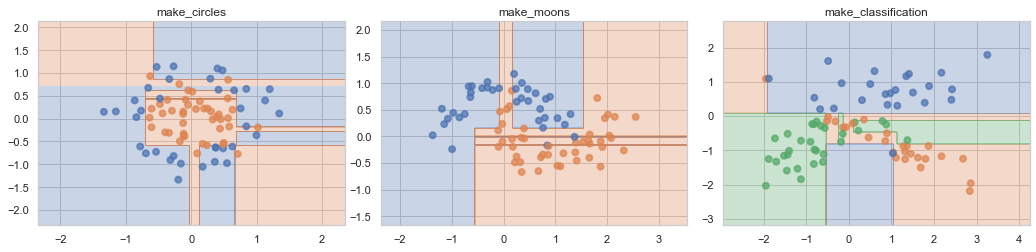

In [107]:
plt.figure(figsize=(15, 4))

for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
    dtc = DecisionTreeClassifier().fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(dtc, x_train, y_train)
    plt.title(datasets_names[i])
    print(datasets_names[i])
    print('train accuracy = ', dtc.score(x_train, y_train))
    print('test accuracy = ', dtc.score(x_test, y_test))

__Ответ:__ Точность на обучающей выборке = 100%. На тестовой выборке она ниже. Это показывает наличие сильного переобучения.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Варьируем параметр min_samples_leaf:

min_samples_leaf=5

make_circles
train accuracy =  0.9125
test accuracy =  0.85
make_moons
train accuracy =  0.95
test accuracy =  0.8
make_classification
train accuracy =  0.9
test accuracy =  0.7


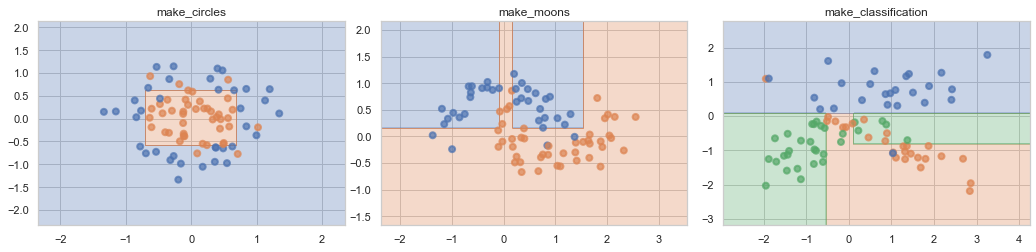

In [108]:
plt.figure(figsize=(15, 4))

for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
    dtc = DecisionTreeClassifier(min_samples_leaf=5).fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(dtc, x_train, y_train)
    plt.title(datasets_names[i])
    print(datasets_names[i])
    print('train accuracy = ', dtc.score(x_train, y_train))
    print('test accuracy = ', dtc.score(x_test, y_test))

min_samples_leaf=2

make_circles
train accuracy =  0.9375
test accuracy =  0.8
make_moons
train accuracy =  0.975
test accuracy =  0.95
make_classification
train accuracy =  0.95
test accuracy =  0.7


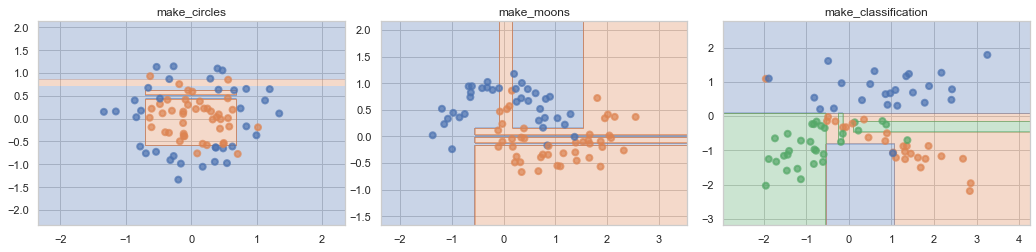

In [109]:
plt.figure(figsize=(15, 4))

for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
    dtc = DecisionTreeClassifier(min_samples_leaf=2).fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(dtc, x_train, y_train)
    plt.title(datasets_names[i])
    print(datasets_names[i])
    print('train accuracy = ', dtc.score(x_train, y_train))
    print('test accuracy = ', dtc.score(x_test, y_test))

Варьируем параметр max_depth:

max_depth=5

make_circles
train accuracy =  0.975
test accuracy =  0.7
make_moons
train accuracy =  0.9875
test accuracy =  0.95
make_classification
train accuracy =  0.9375
test accuracy =  0.7


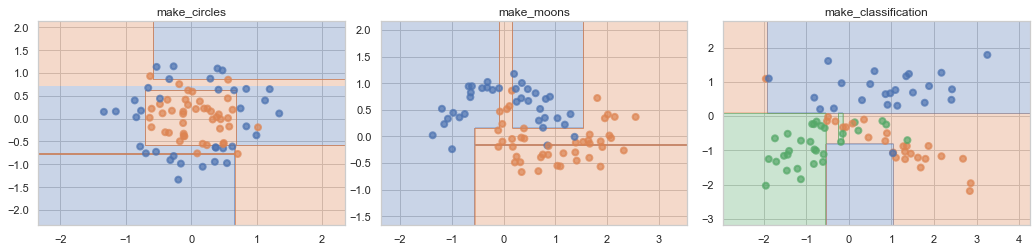

In [110]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
    dtc = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(dtc, x_train, y_train)
    plt.title(datasets_names[i])
    print(datasets_names[i])
    print('train accuracy = ', dtc.score(x_train, y_train))
    print('test accuracy = ', dtc.score(x_test, y_test))

max_depth=15

make_circles
train accuracy =  1.0
test accuracy =  0.7
make_moons
train accuracy =  1.0
test accuracy =  0.8
make_classification
train accuracy =  1.0
test accuracy =  0.8


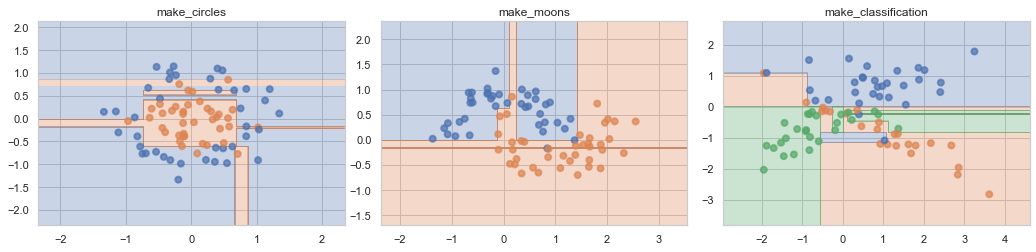

In [111]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
    dtc = DecisionTreeClassifier(max_depth=15).fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(dtc, x_train, y_train)
    plt.title(datasets_names[i])
    print(datasets_names[i])
    print('train accuracy = ', dtc.score(x_train, y_train))
    print('test accuracy = ', dtc.score(x_test, y_test))

__Ответ:__
Увеличение максимально возможного числа объектов в листе и уменьшение максмально возможной глубины дерева приводит к снижению сложности модели и повышению обобщающей способности, дерево меньше подгоняется под особенности обучающей выборки.

Так как первая выборка имеет простую форму разделяющей поверхности, то лучшие результаты достигаются при наибольшем из рассмотренных значений параметра min_samples_leaf и наименьшем значении max_depth.

Вторая выборка имеет чуть более сложную форму, для передачи которой нужно чуть более сложно устроенное дерево(видно по результатам экспериментов с min_samples_list), но общие тенденции схожи с первой выборкой.

Множества объектов в третьей выборке накладываются друг на друга, поэтому их невозможно точно разделить. Результаты разделения третьей выборки во всех экспериментах хуже остальных, быстро наступает переобучение.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [112]:
def find_best_split(feature_vector, target_vector):
    if len(np.unique(feature_vector)) == 1:
        return None

    # сортировка
    sorted_indexes = np.argsort(feature_vector)
    feature_vector = feature_vector[sorted_indexes]
    target_vector = target_vector[sorted_indexes]

    # расчёт Джини
    R = len(target_vector)
    left_sizes = np.arange(1, R)
    right_sizes = R - left_sizes
    cumsums = np.cumsum(target_vector)
    left_sums = cumsums[:-1]
    right_sums = cumsums[-1] - left_sums
    left_p1 = left_sums / left_sizes
    right_p1 = right_sums / right_sizes
    HR_l = 1 - left_p1 ** 2 - (1 - left_p1) ** 2
    HR_r = 1 - right_p1 ** 2 - (1 - right_p1) ** 2
    ginis = (- left_sizes * HR_l - right_sizes * HR_r) / R

    # расчёт порогов
    shape = feature_vector.shape[:-1] + (feature_vector.shape[-1] - 1, 2)
    strides = feature_vector.strides + (feature_vector.strides[-1],)
    thresholds = np.lib.stride_tricks.as_strided(feature_vector, shape=shape, strides=strides)
    thresholds = np.mean(thresholds, axis=1)

    # удаление ненужных разбиений
    idx = np.unique(feature_vector, return_index=True)[1]
    ginis = ginis[idx[1:] - 1]
    thresholds = thresholds[idx[1:] - 1]

    # лучшее разбиение
    best_id = np.argmax(ginis)
    threshold_best = thresholds[best_id]
    gini_best = ginis[best_id]

    return thresholds, ginis, threshold_best, gini_best

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [113]:
data_stud = pd.read_excel('students.xls', sheet_name='Training_Data')
data_stud.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [114]:
print(data_stud['UNS'].unique())

[0 1]


In [115]:
le = LabelEncoder()
for col_name in data_stud.columns:
    data_stud.loc[:, col_name] = le.fit_transform(data_stud.loc[:, col_name])

target_students_train = np.array(data_stud['UNS'])
features_students_train = np.array(data_stud.drop('UNS', axis=1))

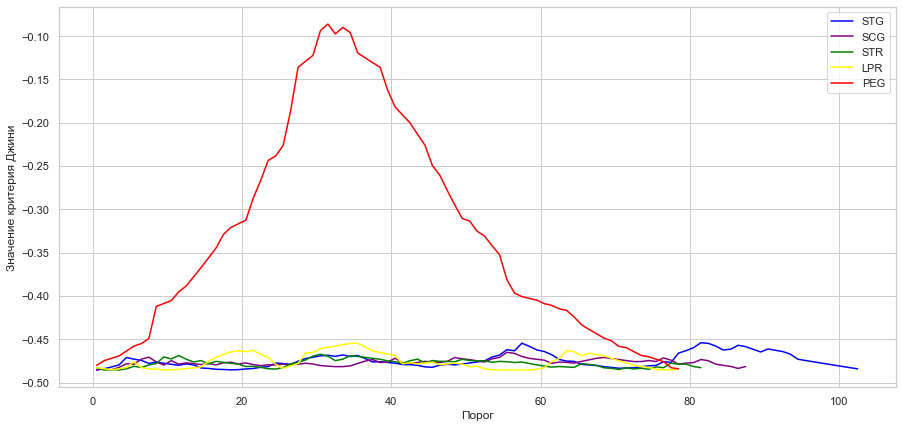

In [116]:
colors = ['blue', 'purple', 'green', 'yellow', 'red']
plt.figure(figsize=(15, 7))

for i in range(features_students_train.shape[1]):
    thresholds, ginis, threshold_best, gini_best = find_best_split(features_students_train[:, i], target_students_train)
    plt.plot(thresholds, ginis, c=colors[i])
    
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джини')
plt.legend(data_stud.columns)

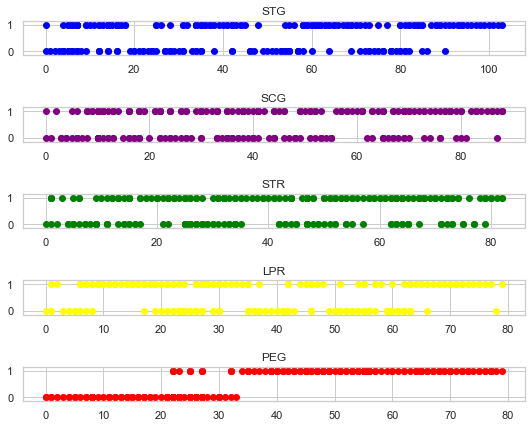

In [117]:
fig, ax = plt.subplots(5, 1, figsize=(9, 7))
plt.subplots_adjust(hspace=1.5)
colors = ['blue', 'purple', 'green', 'yellow', 'red']

for i in range(5):
    ax[i].scatter(features_students_train[:, i], target_students_train, c=colors[i])
    ax[i].set_ylim(-0.15, 1.15)
    ax[i].set_title(data_stud.columns[i])

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
Надо производить деление выборки по признаку PEG. Нужно смотреть на количество максимумов и общую гладкость кривой. 
У хорошего признака скорее всего будет один ярковыраженный максимум. В то же время у плохих признаков зависимость критерия Джини от порога имеет много максимумов, графики у таких признаков достаточно шумные. 
Характерное изменение критерия Джини с изменением порога у плохих признаков мало (то есть он слабо зависит от выбранного порога). Обратная ситуация с хорошим призанком PEG, на нем характерное изменение велико.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Ответ в файле hw5code.py__

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [118]:
data_mushrooms = pd.read_csv('agaricus-lepiota.data')
data_mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [119]:
le = LabelEncoder()
for col_name in data_mushrooms.columns:
    data_mushrooms.loc[:, col_name] = le.fit_transform(data_mushrooms.loc[:, col_name])
data_mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [120]:
target_mushrooms = np.array(data_mushrooms['p'])
features_mushrooms = np.array(data_mushrooms.drop('p', axis=1))
X_train, X_test, y_train, y_test = train_test_split(features_mushrooms, target_mushrooms, test_size=0.8, random_state=42)
data_mushrooms = DecisionTreeClassifier().fit(X_train, y_train)
print('test accuracy = ', data_mushrooms.score(X_test, y_test))
print('train accuracy = ', data_mushrooms.score(X_train, y_train))
print('depth = ', data_mushrooms.get_depth())

test accuracy =  1.0
train accuracy =  1.0
depth =  10


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [121]:
tic_tac_toe = pd.read_csv('tic-tac-toe.data')
tic_tac_toe.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [122]:
le = LabelEncoder()
for col_name in tic_tac_toe.columns:
    tic_tac_toe.loc[:, col_name] = le.fit_transform(tic_tac_toe.loc[:, col_name])
tic_tac_toe.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1


In [123]:
target_tic_tac_toe = np.array(tic_tac_toe['positive'])
features_tic_tac_toe = np.array(tic_tac_toe.drop('positive', axis=1))
X_train, X_test, y_train, y_test = train_test_split(features_tic_tac_toe, target_tic_tac_toe, test_size=0.8, random_state=42)

In [124]:
v = np.arange(2, 25)
param_names = ['max_depth', 'min_samples_split', 'min_samples_leaf']

train_accuracy = np.empty((len(v), len(param_names)))
test_accuracy = np.empty((len(v), len(param_names)))

for j in range(len(v)):
    for i in range(len(param_names)):
        parameter = param_names[i]
        X_train, X_test, y_train, y_test = train_test_split(features_tic_tac_toe, target_tic_tac_toe, test_size=0.33, random_state=42)
        dt_max_depth = DecisionTreeClassifier(max_depth=v[j]).fit(X_train, y_train)
        dt_min_samples_split = DecisionTreeClassifier(min_samples_split=v[j]).fit(X_train, y_train)
        dt_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=v[j]).fit(X_train, y_train)
        
        train_accuracy[j, 0] = dt_max_depth.score(X_train, y_train)
        test_accuracy[j, 0] = dt_max_depth.score(X_test, y_test)
        train_accuracy[j, 1] = dt_min_samples_split.score(X_train, y_train)
        test_accuracy[j, 1] = dt_min_samples_split.score(X_test, y_test)
        train_accuracy[j, 2] = dt_min_samples_leaf.score(X_train, y_train)
        test_accuracy[j, 2] = dt_min_samples_leaf.score(X_test, y_test)

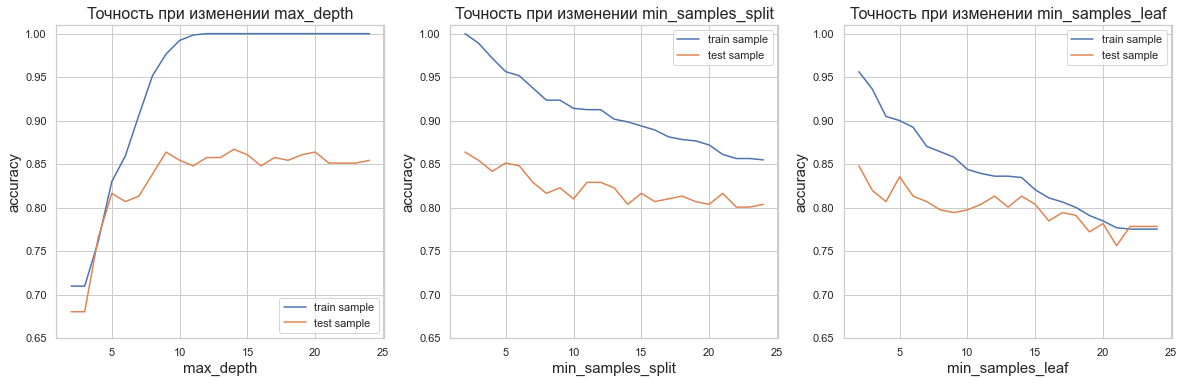

In [126]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
plt.subplots_adjust(top=0.85)

for j in range(len(param_names)):
    ax[j].plot(v, train_accuracy[:, j], label='train sample')
    ax[j].plot(v, test_accuracy[:, j], label='test sample')
    ax[j].set_ylim(0.65, 1.01)
    ax[j].set_xlabel(param_names[j], fontsize=15)
    ax[j].set_ylabel('accuracy', fontsize=15)
    ax[j].set_title('Точность при изменении ' + param_names[j], fontsize=16)
    ax[j].legend()

In [127]:
cars = pd.read_csv('car.data')
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [128]:
cars.loc[(cars['unacc'] == 'unacc'), 'unacc'] = 'acc'
cars.loc[(cars['unacc'] == 'vgood'), 'unacc'] = 'good'
cars['unacc'].unique()

array(['acc', 'good'], dtype=object)

In [129]:
le = LabelEncoder()
for col_name in cars.columns:
    cars.loc[:, col_name] = le.fit_transform(cars.loc[:, col_name])
target_cars = cars['unacc']
features_cars = cars.drop('unacc', axis=1)

In [130]:
nursery = pd.read_csv('nursery.data')
nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [131]:
nursery.loc[(nursery['recommend'] == 'not_recom'), 'recommend'] = 'recommend'
nursery.loc[(nursery['recommend'] == 'very_recom') | (nursery['recommend'] == 'spec_prior'), 'recommend'] = 'priority'
nursery['recommend'].unique()

array(['priority', 'recommend'], dtype=object)

In [132]:
le = LabelEncoder()
for col_name in nursery.columns:
    nursery.loc[:, col_name] = le.fit_transform(nursery.loc[:, col_name])
target_nursery = nursery['recommend']
features_nursery = nursery.drop('recommend', axis=1)

In [133]:
print('Accuracy mushrooms:', cross_val_score(DecisionTreeClassifier(), features_mushrooms, target_mushrooms, cv=10, scoring=make_scorer(accuracy_score)).mean())
print('Accuracy tic_tac_toe:', cross_val_score(DecisionTreeClassifier(), features_tic_tac_toe, target_tic_tac_toe, cv=10, scoring=make_scorer(accuracy_score)).mean())
print('Accuracy cars:', cross_val_score(DecisionTreeClassifier(), features_cars, target_cars, cv=10, scoring=make_scorer(accuracy_score)).mean())
print('Accuracy nursery:', cross_val_score(DecisionTreeClassifier(), features_nursery, target_nursery, cv=10, scoring=make_scorer(accuracy_score)).mean())

Accuracy mushrooms: 0.9582898587606566
Accuracy tic_tac_toe: 0.7860855263157894
Accuracy cars: 0.9449522785320607
Accuracy nursery: 0.9998456790123458


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Самая высокая точность у nursery, а у tic_tac_toe - достаточно низкая.

Результаты на различных датасетах напрямую зависят от сложности данных. Для датасета mushrooms (так же как и для cars и nursery), такая модель как дерево очень хорошо подходит и показывает практически идеальный результат. На датасете tic_tac_toe качество не очень хорошее, так как решается задача бинарной классификации и результат похож на случайное угадывание.